In [1]:
import pandas as pd
import numpy as np
from numpy import random
import sklearn
from sklearn import metrics
import statsmodels.api as sm 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from random import randint

In [2]:
data = pd.read_csv('New_data/LBNL_FDD_Dataset_SDAHU/AHU_annual.csv')
data

,Datetime,CHWC_VLV,CHWC_VLV_DM,MA_TEMP,OA_CFM,OA_DMPR,OA_DMPR_DM,OA_TEMP,RA_CFM,RA_DMPR,...,SF_CS,SF_SPD,SF_SPD_DM,SF_WAT,SYS_CTL,ZONE_TEMP_1,ZONE_TEMP_2,ZONE_TEMP_3,ZONE_TEMP_4,ZONE_TEMP_5
0,2018-01-01 01:00:00,2.635303e-21,0.0,66.374680,357730.44,0.0,0.0,10.355011,0.853194,1.0,...,0.0,0.9,0.0,-2.791519e-13,0.0,73.946520,66.767230,67.027100,66.761345,67.206566
1,2018-01-01 01:01:00,2.479578e-21,0.0,66.374680,357730.44,0.0,0.0,10.040033,0.853057,1.0,...,0.0,0.9,0.0,-2.790612e-13,0.0,73.977770,66.766680,67.025894,66.761290,67.207720
2,2018-01-01 01:02:00,2.380361e-21,0.0,66.374680,357730.44,0.0,0.0,10.055031,0.852918,1.0,...,0.0,0.9,0.0,-2.789696e-13,0.0,74.008360,66.766014,67.024580,66.761185,67.208760
3,2018-01-01 01:03:00,-1.274259e-21,0.0,66.374626,357730.44,0.0,0.0,10.070026,0.852779,1.0,...,0.0,0.9,0.0,-2.788807e-13,0.0,74.038250,66.765305,67.023150,66.761020,67.209700
4,2018-01-01 01:04:00,2.749987e-21,0.0,66.374626,357730.44,0.0,0.0,10.085022,0.852641,1.0,...,0.0,0.9,0.0,-2.787895e-13,0.0,74.067410,66.764530,67.021670,66.760740,67.210570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525535,2018-12-31 23:55:00,1.036425e-28,0.0,69.257660,357730.44,0.0,0.0,21.218018,-0.004739,1.0,...,0.0,0.9,0.0,-8.607382e-18,0.0,72.068450,62.158733,61.904840,62.248436,62.021736
525536,2018-12-31 23:56:00,5.023776e-25,0.0,69.257660,357730.44,0.0,0.0,21.185005,-0.004736,1.0,...,0.0,0.9,0.0,-8.599293e-18,0.0,72.067795,62.154064,61.899567,62.244040,62.016403
525537,2018-12-31 23:57:00,1.209952e-24,0.0,69.257660,357730.44,0.0,0.0,21.151989,-0.004739,1.0,...,0.0,0.9,0.0,-8.605141e-18,0.0,72.067140,62.149395,61.894238,62.239700,62.011078
525538,2018-12-31 23:58:00,-8.305250e-25,0.0,69.257660,357730.44,0.0,0.0,21.119030,-0.004735,1.0,...,0.0,0.9,0.0,-8.592532e-18,0.0,72.066480,62.144670,61.888910,62.235363,62.005690


In [3]:
data = data.set_index('Datetime')
data =data[['RA_TEMP','OA_TEMP', 'MA_TEMP','SA_TEMP','SA_CFM','ZONE_TEMP_1','ZONE_TEMP_2','ZONE_TEMP_3','ZONE_TEMP_4']]
data['OA_TEMP'] = 5 * (data['OA_TEMP'] -32)*1/9 + 273 
data['RA_TEMP'] = 5 * (data['RA_TEMP']-32)*1/9 + 273 
data['MA_TEMP'] = 5 * (data['MA_TEMP']-32)*1/9 + 273 
data['SA_TEMP'] = 5 * (data['SA_TEMP']-32)*1/9 + 273 
data['ZONE_TEMP_1'] = 5 * (data['ZONE_TEMP_1']-32)*1/9 + 273 
data['ZONE_TEMP_2'] = 5 * (data['ZONE_TEMP_2']-32)*1/9 + 273 
data['ZONE_TEMP_3'] = 5 * (data['ZONE_TEMP_3']-32)*1/9 + 273 
data['ZONE_TEMP_4'] = 5 * (data['ZONE_TEMP_4']-32)*1/9 + 273 


In [4]:
data

,RA_TEMP,OA_TEMP,MA_TEMP,SA_TEMP,SA_CFM,ZONE_TEMP_1,ZONE_TEMP_2,ZONE_TEMP_3,ZONE_TEMP_4
Datetime,,,,,,,,,
2018-01-01 01:00:00,293.189861,260.975006,292.097044,292.097044,-0.943331,296.303622,292.315128,292.459500,292.311858
2018-01-01 01:01:00,293.193256,260.800018,292.097044,292.097044,-0.943167,296.320983,292.314822,292.458830,292.311828
2018-01-01 01:02:00,293.196544,260.808351,292.097044,292.097044,-0.943027,296.337978,292.314452,292.458100,292.311769
2018-01-01 01:03:00,293.199711,260.816681,292.097014,292.097014,-0.942867,296.354583,292.314058,292.457306,292.311678
2018-01-01 01:04:00,293.202767,260.825012,292.097014,292.097014,-0.942719,296.370783,292.313628,292.456483,292.311522
...,...,...,...,...,...,...,...,...,...
2018-12-31 23:55:00,290.822467,267.010010,293.698700,293.698700,0.005234,295.260250,289.754852,289.613800,289.804687
2018-12-31 23:56:00,290.820211,266.991669,293.698700,293.698700,0.005237,295.259886,289.752258,289.610871,289.802244
2018-12-31 23:57:00,290.817950,266.973327,293.698700,293.698700,0.005237,295.259522,289.749664,289.607910,289.799833


In [5]:
train_data, test_data = train_test_split(data,test_size=0.3)

In [116]:
train_data.shape

(367878, 9)

In [118]:
test_data.shape

(157662, 9)

In [6]:
def simulateFault(sensedValues, params):
    end_fault_index = int(len(sensedValues) *0.5)
    interval = end_fault_index/6
    BMS = []
    classification = []
    
    noise = random.rand(len(sensedValues)) * 0
    for i in range(0, len(sensedValues)):
        if i <= interval:
            a = params['constant']
            sign = random.randint(1,3)
            if sign == 1:
                BMS.append(noise[i] + a + sensedValues[i])
            else:
                BMS.append(-noise[i] + a + sensedValues[i])
            classification.append(1)

        elif i > interval and i <= interval*2:
            B = params['coeff']
            sign = random.randint(1,3)
            if sign == 1:
                BMS.append(noise[i] + B * sensedValues[i])
            else:
                BMS.append(-noise[i] + B * sensedValues[i])
            classification.append(1)
        elif i > interval*2 and i <= interval*3:
            a = params['cg'][0]
            B = params['cg'][1]
            sign = random.randint(1,3)
            if sign == 1:
                BMS.append(noise[i] + a + (B * sensedValues[i]))
            else:
                BMS.append(-noise[i] + a + (B * sensedValues[i]))
            classification.append(1)
            
        elif i > interval*3 and i <= interval*4:
            a = params['varing time gain']
            B = random.uniform(a[0], a[1])
            sign = random.randint(1,3)
            if sign == 1:
                BMS.append(noise[i] +B * sensedValues[i])
            else:
                BMS.append(-noise[i] + B * sensedValues[i])
            classification.append(1)
        elif i > interval*4 and i<= interval*5:
            a = params['stuck']
            BMS.append(a)
            classification.append(1)
            
        elif i > interval*5 and i<= interval*6:
            type_fault = random.randint(1,3)
            low_bound = params['bounds'][0]
            up_bound = params['bounds'][1]
            if type_fault == 1:
                BMS.append(low_bound-noise[i])
            else:
                BMS.append(up_bound + noise[i])
            classification.append(1)
        else:
            BMS.append(noise[i] + sensedValues[i])
            classification.append(0)

    BMS = np.array(BMS)
    BMS = BMS.round(decimals = 3)
    sensedValues = sensedValues.round(decimals=3)
    return np.array(BMS), np.array(classification)

def simulateSpecificFault(sensedValues, params, value):
    end_fault_index = int(len(sensedValues) * 0.5)
    interval = end_fault_index
    BMS = []
    classification = []
    
    #noise = random.rand(len(sensedValues)) * 0
    
    for i in range(0, len(sensedValues)):
        if i < interval:
            if params == 'constant':
                a = value
                #sign = random.randint(1,3)
                #print('goes here')
                #if sign == 1:
                BMS.append(a + sensedValues[i])
                #else:
                #    BMS.append(noise[i] - a + sensedValues[i])
                classification.append(1)

            elif params == 'gain':
                B = value 
                sign = random.randint(1,3)
                if sign == 1:
                    BMS.append(B * sensedValues[i])
                else:
                    BMS.append(B * sensedValues[i])
                classification.append(1)
            elif params == 'cg':
                a = value[0]
                B = value[1]
                sign = random.randint(1,3)
                if sign == 1:
                    BMS.append(a + (B * sensedValues[i]))
                else:
                    BMS.append(a + (B * sensedValues[i]))
                classification.append(1)
            elif params == 'varing time gain':
                a = value
                B = random.uniform(a[0], a[1])
                sign = random.randint(1,3)
                if sign == 1:
                    BMS.append((B * sensedValues[i]))
                else:
                    BMS.append((B * sensedValues[i]))
                classification.append(1)
            elif params == 'stuck':
                a = value
                BMS.append(a)
                classification.append(1)
            
            elif params == 'bounds':
                half_point = interval/2
                if i < half_point:
                    x = random.randint(273, 289)
                    BMS.append(x)
                else:
                    x = random.randint(303, 323)
                    BMS.append(x)
                classification.append(1)
        else:
            BMS.append(sensedValues[i])
            classification.append(0)

    BMS = np.array(BMS)
    BMS = BMS.round(decimals = 3)
    sensedValues = sensedValues.round(decimals=3)
    return np.array(BMS), np.array(classification)

In [7]:
def sample_vectors(vectors, fault_rate):
    result_x = []
    result_y = []
    end_fault_index1 = int(len(vectors))
    end_fault_index = int(len(vectors) * fault_rate)
    interval = end_fault_index1
    for i in range(0, end_fault_index):
        fault = random.randint(0, int(len(vectors)*0.5))
        result_x.append([vectors['lag_1'][fault],vectors['lag_2'][fault],vectors['lag_3'][fault],vectors['lag_4'][fault],vectors['lag_5'][fault],vectors['lag_6'][fault]])
        # if fault <= interval:
        #     result_y.append(1)

        # elif fault > interval and fault <= interval*2:
        #     result_y.append(2)

        # elif fault > interval*2 and fault<= interval*3:
        #     result_y.append(3)
            
        # elif fault > interval*3 and fault<= interval*4:
        #     result_y.append(4)
        result_y.append(1)
    for i in range(len(result_x),len(vectors)):
        fault = random.randint(int(len(vectors)*0.5),len(vectors))
        result_x.append([vectors['lag_1'][fault],vectors['lag_2'][fault],vectors['lag_3'][fault],vectors['lag_4'][fault],vectors['lag_5'][fault],vectors['lag_6'][fault]])
        result_y.append(0)
    print(len(result_x))
    return result_x, result_y

In [8]:
#Import Navie Bayes model

rates = [0.1,0.2,0.3,0.4,0.5]

i = 0.1


acc = []
offset = []
gain = []
stuck = []
out_bounds = []


#train_data = data[0:20000]
#test_data = data[20000:30000]  


supply_temp_train = train_data.drop(['OA_TEMP','ZONE_TEMP_1','ZONE_TEMP_2','ZONE_TEMP_3','ZONE_TEMP_4'], axis=1)
stuck_val = random.randint(16,32)
print(stuck_val)

FaultData, classification = simulateFault(supply_temp_train['SA_TEMP'],{'constant': 2, 'coeff': 1.00, 'cg':[1.0, 1.00], 'varing time gain': [1,1] ,'stuck': stuck_val, 'bounds': [14,60]})
print(FaultData.shape)
print(classification.shape)
#balance FaultData and classification so ouput is balance 
#-------------------------------------------------------------



#---------------------------------------------------------------
supply_temp_train['supply_temp_BMS'] = FaultData
#supply_temp_train['classification'] = classification
supply_temp_train['lag_1'] = supply_temp_train['SA_TEMP'].shift(1)
supply_temp_train['lag_2'] = supply_temp_train['supply_temp_BMS'].shift(1)
supply_temp_train['lag_3'] = supply_temp_train['SA_TEMP'].shift(2)
supply_temp_train['lag_4'] = supply_temp_train['supply_temp_BMS'].shift(2)
supply_temp_train['lag_5'] = supply_temp_train['SA_TEMP'].shift(3)
supply_temp_train['lag_6'] = supply_temp_train['supply_temp_BMS'].shift(3)
supply_temp_train = supply_temp_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
supply_temp_train = supply_temp_train.dropna()
x_train = supply_temp_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
print(x_train)
y_train = classification[0:len(classification)-3]#supply_temp_train[['classification']]


#Create a svm Classifier
#clf = svm.SVC(kernel='rbf', C = 1, gamma = 0.6, probability = True) # Linear Kernel 
gnb = GaussianNB()
gnb.fit(x_train, y_train)
#Train the model using the training sets
#clf.fit(x_train, y_train)

29
(367878,)
(367878,)
                          lag_1    lag_2       lag_3    lag_4       lag_5  \
Datetime                                                                    
2018-02-23 16:46:00  285.817107  287.817  285.884094  287.884  285.880003   
2018-09-16 16:53:00  285.880003  287.880  285.817107  287.817  285.884094   
2018-06-03 06:22:00  285.879914  287.880  285.880003  287.880  285.817107   
2018-12-05 05:15:00  285.870390  287.870  285.879914  287.880  285.880003   
2018-01-23 08:45:00  293.202756  295.203  285.870390  287.870  285.879914   
...                         ...      ...         ...      ...         ...   
2018-04-08 03:16:00  286.690521  286.691  285.912504  285.913  286.394103   
2018-08-25 06:13:00  286.290253  286.290  286.690521  286.691  285.912504   
2018-01-15 04:55:00  285.879730  285.880  286.290253  286.290  286.690521   
2018-09-17 17:48:00  293.348322  293.348  285.879730  285.880  286.290253   
2018-01-24 12:56:00  294.265011  294.265  293.348322 

GaussianNB()

In [9]:
errType = 'constant'
#test_data = data[int(len(data)*0.8):] #data[end_index-1:end_index + 10]
#test_data = test_data.reset_index()
supply_temp_test = test_data.drop(['OA_TEMP','ZONE_TEMP_1','ZONE_TEMP_2','ZONE_TEMP_3','ZONE_TEMP_4'], axis=1)
#stuck_val = random.randint(16,32)
#print(stuck_val)

#FaultData, classification = simulateFault(supply_temp_test['supply_temp'], {'constant': 4, 'coeff':1.7, 'stuck': stuck_val,'bounds': [14,60]})

FaultData, classification = simulateSpecificFault(test_data['SA_TEMP'], errType,10)
supply_temp_test['supply_temp_BMS'] = FaultData
#supply_temp_test['classification'] = classification[2:len(classification)]
supply_temp_test['lag_1'] = supply_temp_test['SA_TEMP'].shift(1)
supply_temp_test['lag_2'] = supply_temp_test['supply_temp_BMS'].shift(1)
supply_temp_test['lag_3'] = supply_temp_test['SA_TEMP'].shift(2)
supply_temp_test['lag_4'] = supply_temp_test['supply_temp_BMS'].shift(2)
supply_temp_test['lag_5'] = supply_temp_test['SA_TEMP'].shift(3)
supply_temp_test['lag_6'] = supply_temp_test['supply_temp_BMS'].shift(3)
supply_temp_test = supply_temp_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
supply_temp_test = supply_temp_test.dropna()
x_test = supply_temp_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
y_test = classification[0:len(classification)-3]#supply_temp_test[['classification']]
x_test = x_test.reset_index(drop=True)
x_test = np.array(x_test)
y_test = np.array(y_test)
y_pred = gnb.predict(x_test)

#scores = cross_val_score(clf, np.concatenate((x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0), cv=5)
#print(scores)
#target_names = ['No Fault', 'Offset', 'Gain', 'Stuck','Out of Bounds']

target_names = ['No Fault', 'Fault']
#print('FOR rate: ',i)
cnf_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))
column_sum = cnf_matrix.sum(axis = 1)
#print(column_sum)
acc.append(cnf_matrix[1][1] / column_sum[1])
# offset.append(cnf_matrix[1][1] / column_sum[1] )
# gain.append(cnf_matrix[2][2] / column_sum[2])
# stuck.append(cnf_matrix[3][3] / column_sum[3])
# out_bounds.append(cnf_matrix[3][3] / column_sum[3])

#print(acc)
#i = i + 0.1 

              precision    recall  f1-score   support

    No Fault       0.54      0.99      0.70     78828
       Fault       0.93      0.16      0.27     78831

    accuracy                           0.57    157659
   macro avg       0.74      0.57      0.48    157659
weighted avg       0.74      0.57      0.48    157659



C:\Users\renat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [10]:
print("Boosted decision tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print(y_pred)
print(y_test)
print("Boosted decision tree model auc(in %):", metrics.auc(fpr, tpr)*100)
log_loss(y_test,  y_pred, eps=1e-15)
print("Number of mislabeled points out of a total %d points : %d"
         % (x_test.shape[0], (y_test != y_pred).sum()))

Boosted decision tree model accuracy(in %): 57.36114018229216
[[77929   899]
 [66325 12506]]
[0 0 0 ... 0 0 0]
[1 1 1 ... 0 0 0]
Boosted decision tree model auc(in %): 57.361929815852164
Number of mislabeled points out of a total 157659 points : 67224


In [11]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_transformed = scaler.fit_transform(x_train)
X_test_transformed = scaler.fit_transform(x_test)

gbc=GradientBoostingClassifier(n_estimators=30,learning_rate=0.5,random_state=100,max_features=5)

In [13]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_features=5, n_estimators=30,
                           random_state=100)

In [14]:
y_pred_g_c = gbc.predict(x_test)

#scores = cross_val_score(clf, np.concatenate((x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0), cv=5)
#print(scores)
#target_names = ['No Fault', 'Offset', 'Gain', 'Stuck','Out of Bounds']

target_names = ['No Fault', 'Fault']
#print('FOR rate: ',i)
cnf_matrix = confusion_matrix(y_test, y_pred_g_c)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred_g_c, target_names=target_names))
column_sum = cnf_matrix.sum(axis = 1)
#print(column_sum)
acc.append(cnf_matrix[1][1] / column_sum[1])
# offset.append(cnf_matrix[1][1] / column_sum[1] )
# gain.append(cnf_matrix[2][2] / column_sum[2])
# stuck.append(cnf_matrix[3][3] / column_sum[3])
# out_bounds.append(cnf_matrix[3][3] / column_sum[3])

#print(acc)
#i = i + 0.1 

              precision    recall  f1-score   support

    No Fault       1.00      1.00      1.00     78828
       Fault       1.00      1.00      1.00     78831

    accuracy                           1.00    157659
   macro avg       1.00      1.00      1.00    157659
weighted avg       1.00      1.00      1.00    157659



In [15]:
print("Boosted decision tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_g_c)*100)
print(y_test)
print(confusion_matrix(y_pred_g_c, y_test))
fpr_g_c, tpr_g_c, thresholds = metrics.roc_curve(y_test, y_pred_g_c)
print("Boosted decision tree model auc(in %):", metrics.auc(fpr_g_c, tpr_g_c)*100)
log_loss(y_test,  y_pred_g_c, eps=1e-15)
print("Number of mislabeled points out of a total %d points : %d"
         % (x_test.shape[0], (y_test != y_pred_g_c).sum()))

Boosted decision tree model accuracy(in %): 99.95877177960027
[1 1 1 ... 0 0 0]
[[78777    14]
 [   51 78817]]
Boosted decision tree model auc(in %): 99.95877133301957
Number of mislabeled points out of a total 157659 points : 65


In [16]:
bgclassifier = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 200 ,bootstrap=True,random_state = 100)

In [17]:
bgclassifier.fit(x_train, y_train)
#
# Model scores on test and training data
#


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=200,
                  random_state=100)

In [18]:
y_pred_b_c = bgclassifier.predict(x_test)

#scores = cross_val_score(clf, np.concatenate((x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0), cv=5)
#print(scores)
#target_names = ['No Fault', 'Offset', 'Gain', 'Stuck','Out of Bounds']

target_names = ['No Fault', 'Fault']
#print('FOR rate: ',i)
cnf_matrix = confusion_matrix(y_test, y_pred_b_c)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred_b_c, target_names=target_names))
column_sum = cnf_matrix.sum(axis = 1)
#print(column_sum)
acc.append(cnf_matrix[1][1] / column_sum[1])

              precision    recall  f1-score   support

    No Fault       1.00      0.95      0.97     78828
       Fault       0.95      1.00      0.97     78831

    accuracy                           0.97    157659
   macro avg       0.97      0.97      0.97    157659
weighted avg       0.97      0.97      0.97    157659



In [20]:
print("Bagging decision tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_b_c)*100)
print(confusion_matrix(y_test, y_pred_b_c))
fpr_b_c, tpr_b_c, thresholds = metrics.roc_curve(y_test, y_pred_b_c)
print(y_pred_b_c)
print(y_test)
print("Bagging decision tree model auc(in %):", metrics.auc(fpr_b_c, tpr_b_c)*100)
log_loss(y_test,  y_pred_b_c, eps=1e-15)
print("Number of mislabeled points out of a total %d points : %d"
         % (x_test.shape[0], (y_test != y_pred_b_c).sum()))

Bagging decision tree model accuracy(in %): 97.27703461267673
[[74541  4287]
 [    6 78825]]
[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]
Bagging decision tree model auc(in %): 97.27698294282271
Number of mislabeled points out of a total 157659 points : 4293


NameError: name 'x' is not defined

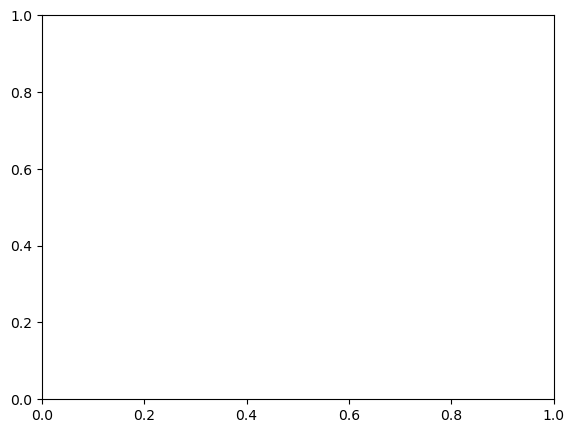

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
fig= plt.figure()
axes= fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(x,y)
sns.set_style('darkgrid')
x1 = ['Boost', 'Bagging']
y1 = [metrics.auc(fpr_g_c, tpr_g_c), metrics.auc(fpr_b, tpr_b)]

sns.barplot(x=y1,y=x1, width = 0.5)
axes.set_title('Constant bais of +2c auc score')
plt.show()

In [144]:
cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_g_c)

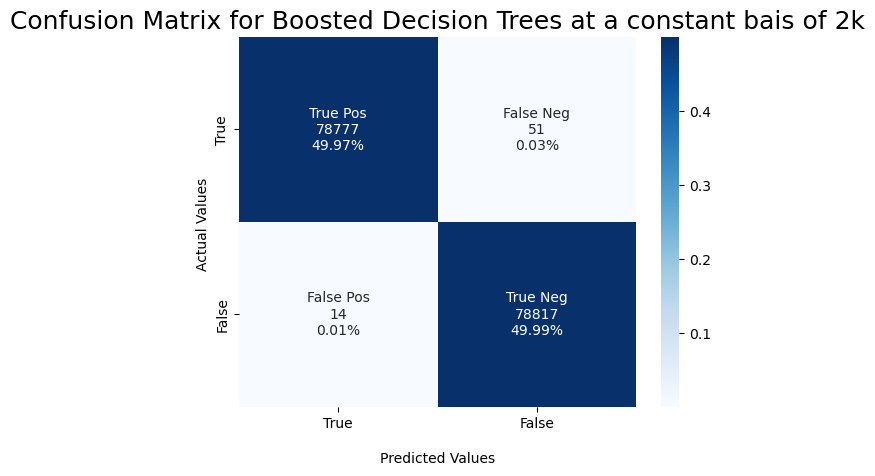

In [145]:
group_names = ['True Pos','False Neg','False Pos','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='',cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.title('Confusion Matrix for Boosted Decision Trees at a constant bais of 2k', fontsize=18)
plt.show()

In [142]:
cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_b_c)

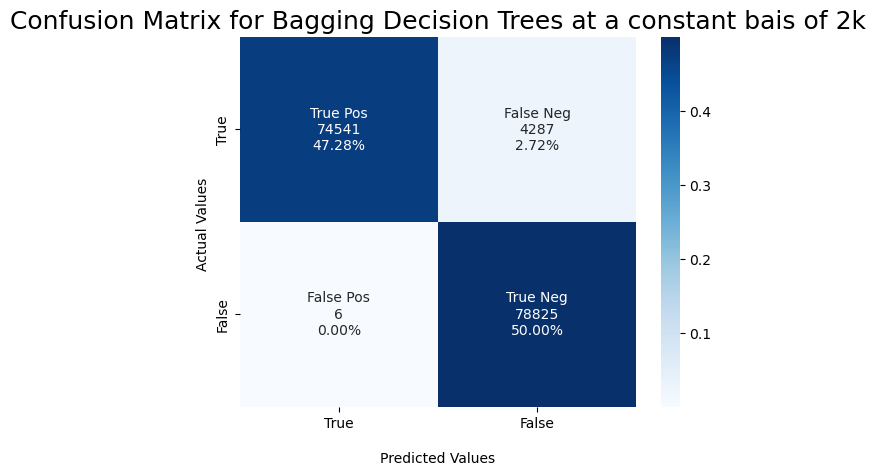

In [143]:
group_names = ['True Pos','False Neg','False Pos','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='',cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.title('Confusion Matrix for Bagging Decision Trees at a constant bais of 2k', fontsize=18)
plt.show()

In [26]:
acc = []
offset = []
gain = []
stuck = []
out_bounds = []


#train_data = data[0:20000]
#test_data = data[20000:30000]  


supply_temp_train = train_data.drop(['OA_TEMP','ZONE_TEMP_1','ZONE_TEMP_2','ZONE_TEMP_3','ZONE_TEMP_4'], axis=1)
stuck_val = random.randint(16,32)
print(stuck_val)

FaultData, classification = simulateFault(supply_temp_train['SA_TEMP'],{'constant': 2, 'coeff': 1.05, 'cg':[1.0, 1.00], 'varing time gain': [1,1] ,'stuck': stuck_val, 'bounds': [14,60]})
print(FaultData.shape)
print(classification.shape)
#balance FaultData and classification so ouput is balance 
#-------------------------------------------------------------



#---------------------------------------------------------------
supply_temp_train['supply_temp_BMS'] = FaultData
#supply_temp_train['classification'] = classification
supply_temp_train['lag_1'] = supply_temp_train['SA_TEMP'].shift(1)
supply_temp_train['lag_2'] = supply_temp_train['supply_temp_BMS'].shift(1)
supply_temp_train['lag_3'] = supply_temp_train['SA_TEMP'].shift(2)
supply_temp_train['lag_4'] = supply_temp_train['supply_temp_BMS'].shift(2)
supply_temp_train['lag_5'] = supply_temp_train['SA_TEMP'].shift(3)
supply_temp_train['lag_6'] = supply_temp_train['supply_temp_BMS'].shift(3)
supply_temp_train = supply_temp_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
supply_temp_train = supply_temp_train.dropna()
x_train = supply_temp_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
print(x_train)
y_train = classification[0:len(classification)-3]#supply_temp_train[['classification']]


#Create a svm Classifier
#clf = svm.SVC(kernel='rbf', C = 1, gamma = 0.6, probability = True) # Linear Kernel 
gnb = GaussianNB()
gnb.fit(x_train, y_train)
#Train the model using the training sets
#clf.fit(x_train, y_train)

28
(367878,)
(367878,)
                          lag_1    lag_2       lag_3    lag_4       lag_5  \
Datetime                                                                    
2018-02-23 16:46:00  285.817107  287.817  285.884094  287.884  285.880003   
2018-09-16 16:53:00  285.880003  287.880  285.817107  287.817  285.884094   
2018-06-03 06:22:00  285.879914  287.880  285.880003  287.880  285.817107   
2018-12-05 05:15:00  285.870390  287.870  285.879914  287.880  285.880003   
2018-01-23 08:45:00  293.202756  295.203  285.870390  287.870  285.879914   
...                         ...      ...         ...      ...         ...   
2018-04-08 03:16:00  286.690521  286.691  285.912504  285.913  286.394103   
2018-08-25 06:13:00  286.290253  286.290  286.690521  286.691  285.912504   
2018-01-15 04:55:00  285.879730  285.880  286.290253  286.290  286.690521   
2018-09-17 17:48:00  293.348322  293.348  285.879730  285.880  286.290253   
2018-01-24 12:56:00  294.265011  294.265  293.348322 

GaussianNB()

In [27]:
errType = 'gain'
#test_data = data[int(len(data)*0.8):] #data[end_index-1:end_index + 10]
#test_data = test_data.reset_index()
supply_temp_test = test_data.drop(['OA_TEMP','ZONE_TEMP_1','ZONE_TEMP_2','ZONE_TEMP_3','ZONE_TEMP_4'], axis=1)
#stuck_val = random.randint(16,32)
#print(stuck_val)

#FaultData, classification = simulateFault(supply_temp_test['supply_temp'], {'constant': 4, 'coeff':1.7, 'stuck': stuck_val,'bounds': [14,60]})

FaultData, classification = simulateSpecificFault(test_data['SA_TEMP'], errType,1.05)
supply_temp_test['supply_temp_BMS'] = FaultData
#supply_temp_test['classification'] = classification[2:len(classification)]
supply_temp_test['lag_1'] = supply_temp_test['SA_TEMP'].shift(1)
supply_temp_test['lag_2'] = supply_temp_test['supply_temp_BMS'].shift(1)
supply_temp_test['lag_3'] = supply_temp_test['SA_TEMP'].shift(2)
supply_temp_test['lag_4'] = supply_temp_test['supply_temp_BMS'].shift(2)
supply_temp_test['lag_5'] = supply_temp_test['SA_TEMP'].shift(3)
supply_temp_test['lag_6'] = supply_temp_test['supply_temp_BMS'].shift(3)
supply_temp_test = supply_temp_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
supply_temp_test = supply_temp_test.dropna()
x_test = supply_temp_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
y_test = classification[0:len(classification)-3]#supply_temp_test[['classification']]
x_test = x_test.reset_index(drop=True)
x_test = np.array(x_test)
y_test = np.array(y_test)
y_pred = gnb.predict(x_test)

#scores = cross_val_score(clf, np.concatenate((x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0), cv=5)
#print(scores)
#target_names = ['No Fault', 'Offset', 'Gain', 'Stuck','Out of Bounds']

target_names = ['No Fault', 'Fault']
#print('FOR rate: ',i)
cnf_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))
column_sum = cnf_matrix.sum(axis = 1)
#print(column_sum)
acc.append(cnf_matrix[1][1] / column_sum[1])
# offset.append(cnf_matrix[1][1] / column_sum[1] )
# gain.append(cnf_matrix[2][2] / column_sum[2])
# stuck.append(cnf_matrix[3][3] / column_sum[3])
# out_bounds.append(cnf_matrix[3][3] / column_sum[3])

#print(acc)
#i = i + 0.1 

              precision    recall  f1-score   support

    No Fault       0.62      0.99      0.76     78828
       Fault       0.97      0.39      0.55     78831

    accuracy                           0.69    157659
   macro avg       0.79      0.69      0.66    157659
weighted avg       0.79      0.69      0.66    157659



In [28]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_features=5, n_estimators=30,
                           random_state=100)

In [29]:
y_pred_g_g = gbc.predict(x_test)

#scores = cross_val_score(clf, np.concatenate((x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0), cv=5)
#print(scores)
#target_names = ['No Fault', 'Offset', 'Gain', 'Stuck','Out of Bounds']

target_names = ['No Fault', 'Fault']
#print('FOR rate: ',i)
cnf_matrix = confusion_matrix(y_test, y_pred_g_g)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred_g_g, target_names=target_names))
column_sum = cnf_matrix.sum(axis = 1)
#print(column_sum)
acc.append(cnf_matrix[1][1] / column_sum[1])
# offset.append(cnf_matrix[1][1] / column_sum[1] )
# gain.append(cnf_matrix[2][2] / column_sum[2])
# stuck.append(cnf_matrix[3][3] / column_sum[3])
# out_bounds.append(cnf_matrix[3][3] / column_sum[3])

#print(acc)
#i = i + 0.1 

              precision    recall  f1-score   support

    No Fault       1.00      1.00      1.00     78828
       Fault       1.00      1.00      1.00     78831

    accuracy                           1.00    157659
   macro avg       1.00      1.00      1.00    157659
weighted avg       1.00      1.00      1.00    157659



In [30]:
print("Boosted decision tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_g_g)*100)
print(y_test)
print(confusion_matrix(y_pred_g_g, y_test))
fpr_g_g, tpr_g_g, thresholds = metrics.roc_curve(y_test, y_pred_g_g)
print("Boosted decision tree model auc(in %):", metrics.auc(fpr_g_g, tpr_g_g)*100)
log_loss(y_test,  y_pred_g_g, eps=1e-15)
print("Number of mislabeled points out of a total %d points : %d"
         % (x_test.shape[0], (y_test != y_pred_g_g).sum()))

Boosted decision tree model accuracy(in %): 99.99556003780312
[1 1 1 ... 0 0 0]
[[78822     1]
 [    6 78830]]
Boosted decision tree model auc(in %): 99.99555997745477
Number of mislabeled points out of a total 157659 points : 7


In [31]:
bgclassifier.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=200,
                  random_state=100)

In [32]:
y_pred_b_g = bgclassifier.predict(x_test)

#scores = cross_val_score(clf, np.concatenate((x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0), cv=5)
#print(scores)
#target_names = ['No Fault', 'Offset', 'Gain', 'Stuck','Out of Bounds']

target_names = ['No Fault', 'Fault']
#print('FOR rate: ',i)
cnf_matrix = confusion_matrix(y_test, y_pred_b_g)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred_b_g, target_names=target_names))
column_sum = cnf_matrix.sum(axis = 1)
#print(column_sum)
acc.append(cnf_matrix[1][1] / column_sum[1])

              precision    recall  f1-score   support

    No Fault       1.00      0.99      1.00     78828
       Fault       0.99      1.00      1.00     78831

    accuracy                           1.00    157659
   macro avg       1.00      1.00      1.00    157659
weighted avg       1.00      1.00      1.00    157659



In [34]:
print("Bagging decision tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_b_g)*100)
print(confusion_matrix(y_test, y_pred_b_g))
fpr_b_g, tpr_b_g, thresholds = metrics.roc_curve(y_test, y_pred_b_g)
print(y_pred_b_g)
print(y_test)
print("Bagging decision tree model auc(in %):", metrics.auc(fpr_b_g, tpr_b_g)*100)
log_loss(y_test,  y_pred_b_g, eps=1e-15)
print("Number of mislabeled points out of a total %d points : %d"
         % (x_test.shape[0], (y_test != y_pred_b_g).sum()))

Bagging decision tree model accuracy(in %): 99.6409973423655
[[78263   565]
 [    1 78830]]
[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]
Bagging decision tree model auc(in %): 99.64099053512463
Number of mislabeled points out of a total 157659 points : 566


In [35]:
cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_g_g)

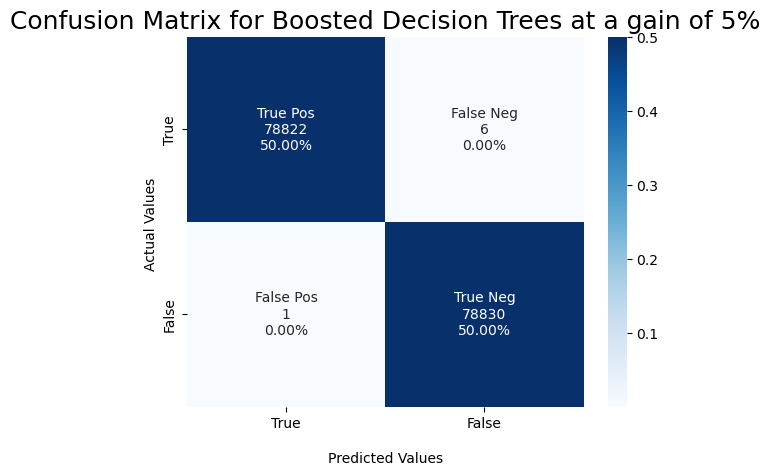

In [36]:
group_names = ['True Pos','False Neg','False Pos','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='',cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.title('Confusion Matrix for Boosted Decision Trees at a gain of 5%', fontsize=18)
plt.show()

In [37]:
cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_b_g)

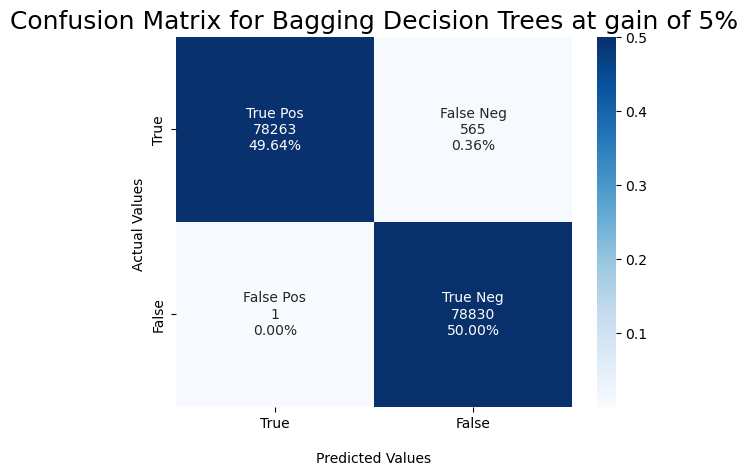

In [38]:
group_names = ['True Pos','False Neg','False Pos','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='',cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.title('Confusion Matrix for Bagging Decision Trees at gain of 5%', fontsize=18)
plt.show()

NameError: name 'x' is not defined

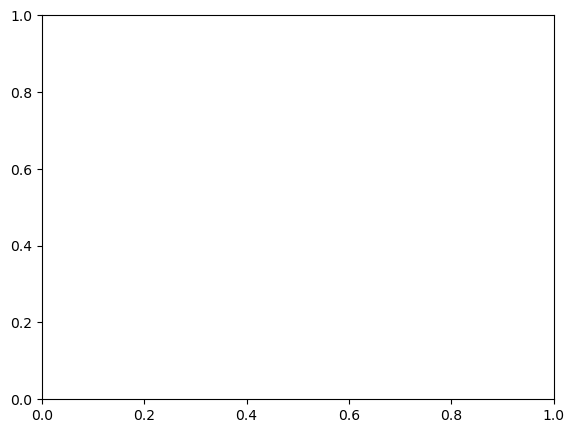

In [39]:
fig= plt.figure()
axes= fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(x,y)
sns.set_style('darkgrid')
x1 = ['Boost', 'Bagging']
y1 = [metrics.auc(fpr_g_g, tpr_g_g), metrics.auc(fpr_b_g, tpr_b_g)]

sns.barplot(x=y1,y=x1, width = 0.5)
axes.set_title('gain of 5% auc score')
plt.show()

In [40]:
acc = []
offset = []
gain = []
stuck = []
out_bounds = []


#train_data = data[0:20000]
#test_data = data[20000:30000]  


supply_temp_train = train_data.drop(['OA_TEMP','ZONE_TEMP_1','ZONE_TEMP_2','ZONE_TEMP_3','ZONE_TEMP_4'], axis=1)
stuck_val = random.randint(16,32)
print(stuck_val)

FaultData, classification = simulateFault(supply_temp_train['SA_TEMP'],{'constant': 2, 'coeff': 1.05, 'cg':[2.0, 1.05], 'varing time gain': [1,1] ,'stuck': stuck_val, 'bounds': [14,60]})
print(FaultData.shape)
print(classification.shape)
#balance FaultData and classification so ouput is balance 
#-------------------------------------------------------------



#---------------------------------------------------------------
supply_temp_train['supply_temp_BMS'] = FaultData
#supply_temp_train['classification'] = classification
supply_temp_train['lag_1'] = supply_temp_train['SA_TEMP'].shift(1)
supply_temp_train['lag_2'] = supply_temp_train['supply_temp_BMS'].shift(1)
supply_temp_train['lag_3'] = supply_temp_train['SA_TEMP'].shift(2)
supply_temp_train['lag_4'] = supply_temp_train['supply_temp_BMS'].shift(2)
supply_temp_train['lag_5'] = supply_temp_train['SA_TEMP'].shift(3)
supply_temp_train['lag_6'] = supply_temp_train['supply_temp_BMS'].shift(3)
supply_temp_train = supply_temp_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
supply_temp_train = supply_temp_train.dropna()
x_train = supply_temp_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
print(x_train)
y_train = classification[0:len(classification)-3]#supply_temp_train[['classification']]


#Create a svm Classifier
#clf = svm.SVC(kernel='rbf', C = 1, gamma = 0.6, probability = True) # Linear Kernel 
gnb = GaussianNB()
gnb.fit(x_train, y_train)
#Train the model using the training sets
#clf.fit(x_train, y_train)

21
(367878,)
(367878,)
                          lag_1    lag_2       lag_3    lag_4       lag_5  \
Datetime                                                                    
2018-02-23 16:46:00  285.817107  287.817  285.884094  287.884  285.880003   
2018-09-16 16:53:00  285.880003  287.880  285.817107  287.817  285.884094   
2018-06-03 06:22:00  285.879914  287.880  285.880003  287.880  285.817107   
2018-12-05 05:15:00  285.870390  287.870  285.879914  287.880  285.880003   
2018-01-23 08:45:00  293.202756  295.203  285.870390  287.870  285.879914   
...                         ...      ...         ...      ...         ...   
2018-04-08 03:16:00  286.690521  286.691  285.912504  285.913  286.394103   
2018-08-25 06:13:00  286.290253  286.290  286.690521  286.691  285.912504   
2018-01-15 04:55:00  285.879730  285.880  286.290253  286.290  286.690521   
2018-09-17 17:48:00  293.348322  293.348  285.879730  285.880  286.290253   
2018-01-24 12:56:00  294.265011  294.265  293.348322 

GaussianNB()

In [41]:
errType = 'cg'
#test_data = data[int(len(data)*0.8):] #data[end_index-1:end_index + 10]
#test_data = test_data.reset_index()
supply_temp_test = test_data.drop(['OA_TEMP','ZONE_TEMP_1','ZONE_TEMP_2','ZONE_TEMP_3','ZONE_TEMP_4'], axis=1)
#stuck_val = random.randint(16,32)
#print(stuck_val)

#FaultData, classification = simulateFault(supply_temp_test['supply_temp'], {'constant': 4, 'coeff':1.7, 'stuck': stuck_val,'bounds': [14,60]})

FaultData, classification = simulateSpecificFault(test_data['SA_TEMP'], errType,[2, 1.05])
supply_temp_test['supply_temp_BMS'] = FaultData
#supply_temp_test['classification'] = classification[2:len(classification)]
supply_temp_test['lag_1'] = supply_temp_test['SA_TEMP'].shift(1)
supply_temp_test['lag_2'] = supply_temp_test['supply_temp_BMS'].shift(1)
supply_temp_test['lag_3'] = supply_temp_test['SA_TEMP'].shift(2)
supply_temp_test['lag_4'] = supply_temp_test['supply_temp_BMS'].shift(2)
supply_temp_test['lag_5'] = supply_temp_test['SA_TEMP'].shift(3)
supply_temp_test['lag_6'] = supply_temp_test['supply_temp_BMS'].shift(3)
supply_temp_test = supply_temp_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
supply_temp_test = supply_temp_test.dropna()
x_test = supply_temp_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
y_test = classification[0:len(classification)-3]#supply_temp_test[['classification']]
x_test = x_test.reset_index(drop=True)
x_test = np.array(x_test)
y_test = np.array(y_test)
y_pred = gnb.predict(x_test)

#scores = cross_val_score(clf, np.concatenate((x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0), cv=5)
#print(scores)
#target_names = ['No Fault', 'Offset', 'Gain', 'Stuck','Out of Bounds']

target_names = ['No Fault', 'Fault']
#print('FOR rate: ',i)
cnf_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))
column_sum = cnf_matrix.sum(axis = 1)
#print(column_sum)
acc.append(cnf_matrix[1][1] / column_sum[1])
# offset.append(cnf_matrix[1][1] / column_sum[1] )
# gain.append(cnf_matrix[2][2] / column_sum[2])
# stuck.append(cnf_matrix[3][3] / column_sum[3])
# out_bounds.append(cnf_matrix[3][3] / column_sum[3])

#print(acc)
#i = i + 0.1 

              precision    recall  f1-score   support

    No Fault       0.74      0.99      0.85     78828
       Fault       0.98      0.65      0.78     78831

    accuracy                           0.82    157659
   macro avg       0.86      0.82      0.82    157659
weighted avg       0.86      0.82      0.82    157659



In [42]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_features=5, n_estimators=30,
                           random_state=100)

In [43]:
y_pred_g_cg = gbc.predict(x_test)

#scores = cross_val_score(clf, np.concatenate((x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0), cv=5)
#print(scores)
#target_names = ['No Fault', 'Offset', 'Gain', 'Stuck','Out of Bounds']

target_names = ['No Fault', 'Fault']
#print('FOR rate: ',i)
cnf_matrix = confusion_matrix(y_test, y_pred_g_cg)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred_g_cg, target_names=target_names))
column_sum = cnf_matrix.sum(axis = 1)
#print(column_sum)
acc.append(cnf_matrix[1][1] / column_sum[1])
# offset.append(cnf_matrix[1][1] / column_sum[1] )
# gain.append(cnf_matrix[2][2] / column_sum[2])
# stuck.append(cnf_matrix[3][3] / column_sum[3])
# out_bounds.append(cnf_matrix[3][3] / column_sum[3])

#print(acc)
#i = i + 0.1 

              precision    recall  f1-score   support

    No Fault       1.00      1.00      1.00     78828
       Fault       1.00      1.00      1.00     78831

    accuracy                           1.00    157659
   macro avg       1.00      1.00      1.00    157659
weighted avg       1.00      1.00      1.00    157659



In [46]:
print("Boosted decision tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_g_cg)*100)
print(y_test)
print(confusion_matrix(y_pred_g_cg, y_test))
fpr_g_cg, tpr_g_cg, thresholds = metrics.roc_curve(y_test, y_pred_g_cg)
print("Boosted decision tree model auc(in %):", metrics.auc(fpr_g_cg, tpr_g_cg)*100)
log_loss(y_test,  y_pred_g_cg, eps=1e-15)
print("Number of mislabeled points out of a total %d points : %d"
         % (x_test.shape[0], (y_test != y_pred_g_cg).sum()))

Boosted decision tree model accuracy(in %): 99.98858295435085
[1 1 1 ... 0 0 0]
[[78811     1]
 [   17 78830]]
Boosted decision tree model auc(in %): 99.98858276123718
Number of mislabeled points out of a total 157659 points : 18


In [47]:
bgclassifier.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=200,
                  random_state=100)

In [48]:
y_pred_b_cg = bgclassifier.predict(x_test)

#scores = cross_val_score(clf, np.concatenate((x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0), cv=5)
#print(scores)
#target_names = ['No Fault', 'Offset', 'Gain', 'Stuck','Out of Bounds']

target_names = ['No Fault', 'Fault']
#print('FOR rate: ',i)
cnf_matrix = confusion_matrix(y_test, y_pred_b_cg)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred_b_cg, target_names=target_names))
column_sum = cnf_matrix.sum(axis = 1)
#print(column_sum)
acc.append(cnf_matrix[1][1] / column_sum[1])

              precision    recall  f1-score   support

    No Fault       1.00      0.99      1.00     78828
       Fault       0.99      1.00      1.00     78831

    accuracy                           1.00    157659
   macro avg       1.00      1.00      1.00    157659
weighted avg       1.00      1.00      1.00    157659



In [50]:
print("Bagging decision tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_b_cg)*100)
print(confusion_matrix(y_test, y_pred_b_cg))
fpr_b_cg, tpr_b_cg, thresholds = metrics.roc_curve(y_test, y_pred_b_cg)
print(y_pred_b_cg)
print(y_test)
print("Bagging decision tree model auc(in %):", metrics.auc(fpr_b_cg, tpr_b_cg)*100)
log_loss(y_test,  y_pred_b_cg, eps=1e-15)
print("Number of mislabeled points out of a total %d points : %d"
         % (x_test.shape[0], (y_test != y_pred_b_cg).sum()))

Bagging decision tree model accuracy(in %): 99.63719166048244
[[78256   572]
 [    0 78831]]
[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]
Bagging decision tree model auc(in %): 99.63718475668544
Number of mislabeled points out of a total 157659 points : 572


In [146]:
cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_g_cg)

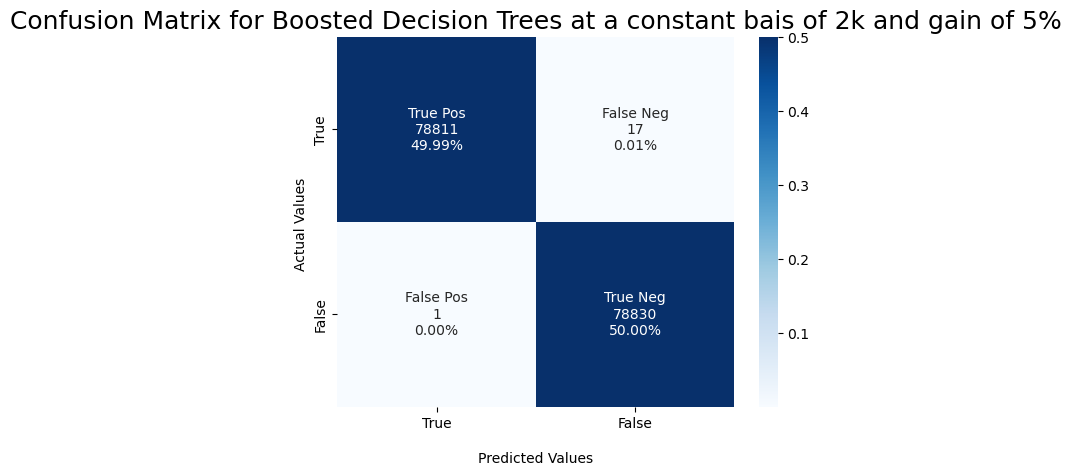

In [147]:
group_names = ['True Pos','False Neg','False Pos','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='',cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.title('Confusion Matrix for Boosted Decision Trees at a constant bais of 2k and gain of 5%', fontsize=18)
plt.show()

In [150]:
cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_b_cg)

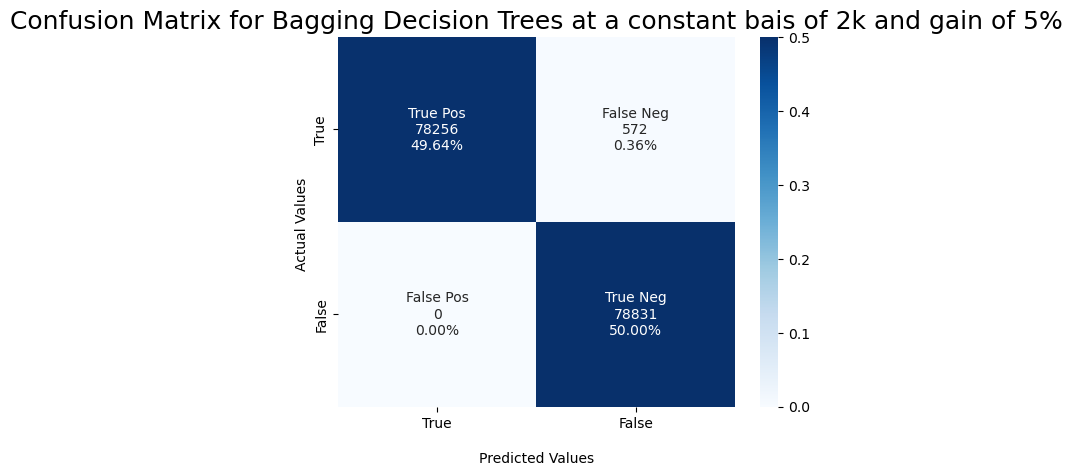

In [151]:
group_names = ['True Pos','False Neg','False Pos','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='',cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.title('Confusion Matrix for Bagging Decision Trees at a constant bais of 2k and gain of 5%', fontsize=18)
plt.show()

NameError: name 'x' is not defined

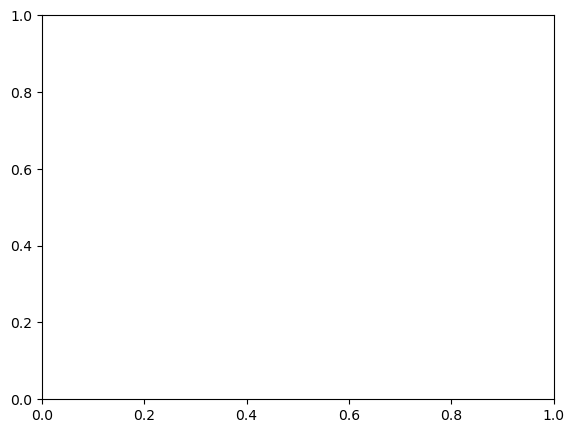

In [55]:
fig= plt.figure()
axes= fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(x,y)
sns.set_style('darkgrid')
x1 = ['Boost', 'Bagging']
y1 = [metrics.auc(fpr_g_cg, tpr_g_cg), metrics.auc(fpr_b_cg, tpr_b_cg)]

sns.barplot(x=y1,y=x1, width = 0.5)
axes.set_title('Constant at 2c and gain of 5% auc score')
plt.show()

In [56]:
acc = []
offset = []
gain = []
stuck = []
out_bounds = []


#train_data = data[0:20000]
#test_data = data[20000:30000]  


supply_temp_train = train_data.drop(['OA_TEMP','ZONE_TEMP_1','ZONE_TEMP_2','ZONE_TEMP_3','ZONE_TEMP_4'], axis=1)
stuck_val = random.randint(16,32)
print(stuck_val)

FaultData, classification = simulateFault(supply_temp_train['SA_TEMP'],{'constant': 2, 'coeff': 1.05, 'cg':[2.0, 1.05], 'varing time gain': [1.00,1.5] ,'stuck': stuck_val, 'bounds': [14,60]})
print(FaultData.shape)
print(classification.shape)
#balance FaultData and classification so ouput is balance 
#-------------------------------------------------------------



#---------------------------------------------------------------
supply_temp_train['supply_temp_BMS'] = FaultData
#supply_temp_train['classification'] = classification
supply_temp_train['lag_1'] = supply_temp_train['SA_TEMP'].shift(1)
supply_temp_train['lag_2'] = supply_temp_train['supply_temp_BMS'].shift(1)
supply_temp_train['lag_3'] = supply_temp_train['SA_TEMP'].shift(2)
supply_temp_train['lag_4'] = supply_temp_train['supply_temp_BMS'].shift(2)
supply_temp_train['lag_5'] = supply_temp_train['SA_TEMP'].shift(3)
supply_temp_train['lag_6'] = supply_temp_train['supply_temp_BMS'].shift(3)
supply_temp_train = supply_temp_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
supply_temp_train = supply_temp_train.dropna()
x_train = supply_temp_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
print(x_train)
y_train = classification[0:len(classification)-3]#supply_temp_train[['classification']]


#Create a svm Classifier
#clf = svm.SVC(kernel='rbf', C = 1, gamma = 0.6, probability = True) # Linear Kernel 
gnb = GaussianNB()
gnb.fit(x_train, y_train)
#Train the model using the training sets
#clf.fit(x_train, y_train)

19
(367878,)
(367878,)
                          lag_1    lag_2       lag_3    lag_4       lag_5  \
Datetime                                                                    
2018-02-23 16:46:00  285.817107  287.817  285.884094  287.884  285.880003   
2018-09-16 16:53:00  285.880003  287.880  285.817107  287.817  285.884094   
2018-06-03 06:22:00  285.879914  287.880  285.880003  287.880  285.817107   
2018-12-05 05:15:00  285.870390  287.870  285.879914  287.880  285.880003   
2018-01-23 08:45:00  293.202756  295.203  285.870390  287.870  285.879914   
...                         ...      ...         ...      ...         ...   
2018-04-08 03:16:00  286.690521  286.691  285.912504  285.913  286.394103   
2018-08-25 06:13:00  286.290253  286.290  286.690521  286.691  285.912504   
2018-01-15 04:55:00  285.879730  285.880  286.290253  286.290  286.690521   
2018-09-17 17:48:00  293.348322  293.348  285.879730  285.880  286.290253   
2018-01-24 12:56:00  294.265011  294.265  293.348322 

GaussianNB()

In [57]:
errType = 'varing time gain'
#test_data = data[int(len(data)*0.8):] #data[end_index-1:end_index + 10]
#test_data = test_data.reset_index()
supply_temp_test = test_data.drop(['OA_TEMP','ZONE_TEMP_1','ZONE_TEMP_2','ZONE_TEMP_3','ZONE_TEMP_4'], axis=1)
#stuck_val = random.randint(16,32)
#print(stuck_val)

#FaultData, classification = simulateFault(supply_temp_test['supply_temp'], {'constant': 4, 'coeff':1.7, 'stuck': stuck_val,'bounds': [14,60]})

FaultData, classification = simulateSpecificFault(test_data['SA_TEMP'], errType, [1.00,1.5] )
supply_temp_test['supply_temp_BMS'] = FaultData
#supply_temp_test['classification'] = classification[2:len(classification)]
supply_temp_test['lag_1'] = supply_temp_test['SA_TEMP'].shift(1)
supply_temp_test['lag_2'] = supply_temp_test['supply_temp_BMS'].shift(1)
supply_temp_test['lag_3'] = supply_temp_test['SA_TEMP'].shift(2)
supply_temp_test['lag_4'] = supply_temp_test['supply_temp_BMS'].shift(2)
supply_temp_test['lag_5'] = supply_temp_test['SA_TEMP'].shift(3)
supply_temp_test['lag_6'] = supply_temp_test['supply_temp_BMS'].shift(3)
supply_temp_test = supply_temp_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
supply_temp_test = supply_temp_test.dropna()
x_test = supply_temp_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
y_test = classification[0:len(classification)-3]#supply_temp_test[['classification']]
x_test = x_test.reset_index(drop=True)
x_test = np.array(x_test)
y_test = np.array(y_test)
y_pred = gnb.predict(x_test)

#scores = cross_val_score(clf, np.concatenate((x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0), cv=5)
#print(scores)
#target_names = ['No Fault', 'Offset', 'Gain', 'Stuck','Out of Bounds']

target_names = ['No Fault', 'Fault']
#print('FOR rate: ',i)
cnf_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))
column_sum = cnf_matrix.sum(axis = 1)
#print(column_sum)
acc.append(cnf_matrix[1][1] / column_sum[1])
# offset.append(cnf_matrix[1][1] / column_sum[1] )
# gain.append(cnf_matrix[2][2] / column_sum[2])
# stuck.append(cnf_matrix[3][3] / column_sum[3])
# out_bounds.append(cnf_matrix[3][3] / column_sum[3])

#print(acc)
#i = i + 0.1 

              precision    recall  f1-score   support

    No Fault       1.00      0.99      0.99     78828
       Fault       0.99      1.00      0.99     78831

    accuracy                           0.99    157659
   macro avg       0.99      0.99      0.99    157659
weighted avg       0.99      0.99      0.99    157659



In [58]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_features=5, n_estimators=30,
                           random_state=100)

In [59]:
y_pred_g_vg = gbc.predict(x_test)

#scores = cross_val_score(clf, np.concatenate((x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0), cv=5)
#print(scores)
#target_names = ['No Fault', 'Offset', 'Gain', 'Stuck','Out of Bounds']

target_names = ['No Fault', 'Fault']
#print('FOR rate: ',i)
cnf_matrix = confusion_matrix(y_test, y_pred_g_vg)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred_g_vg, target_names=target_names))
column_sum = cnf_matrix.sum(axis = 1)
#print(column_sum)
acc.append(cnf_matrix[1][1] / column_sum[1])
# offset.append(cnf_matrix[1][1] / column_sum[1] )
# gain.append(cnf_matrix[2][2] / column_sum[2])
# stuck.append(cnf_matrix[3][3] / column_sum[3])
# out_bounds.append(cnf_matrix[3][3] / column_sum[3])

#print(acc)
#i = i + 0.1 

              precision    recall  f1-score   support

    No Fault       1.00      1.00      1.00     78828
       Fault       1.00      1.00      1.00     78831

    accuracy                           1.00    157659
   macro avg       1.00      1.00      1.00    157659
weighted avg       1.00      1.00      1.00    157659



In [60]:
print("Boosted decision tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_g_vg)*100)
print(y_test)
print(confusion_matrix(y_pred_g_vg, y_test))
fpr_g_vg, tpr_g_vg, thresholds = metrics.roc_curve(y_test, y_pred_g_vg)
print("Boosted decision tree model auc(in %):", metrics.auc(fpr_g_vg, tpr_g_vg)*100)
log_loss(y_test,  y_pred_g_vg, eps=1e-15)
print("Number of mislabeled points out of a total %d points : %d"
         % (x_test.shape[0], (y_test != y_pred_g_vg).sum()))

Boosted decision tree model accuracy(in %): 99.96892026462176
[1 1 1 ... 0 0 0]
[[78821    42]
 [    7 78789]]
Boosted decision tree model auc(in %): 99.9689206870376
Number of mislabeled points out of a total 157659 points : 49


In [61]:
bgclassifier.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=200,
                  random_state=100)

In [62]:
y_pred_b_vg = bgclassifier.predict(x_test)

#scores = cross_val_score(clf, np.concatenate((x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0), cv=5)
#print(scores)
#target_names = ['No Fault', 'Offset', 'Gain', 'Stuck','Out of Bounds']

target_names = ['No Fault', 'Fault']
#print('FOR rate: ',i)
cnf_matrix = confusion_matrix(y_test, y_pred_b_vg)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred_b_vg, target_names=target_names))
column_sum = cnf_matrix.sum(axis = 1)
#print(column_sum)
acc.append(cnf_matrix[1][1] / column_sum[1])

              precision    recall  f1-score   support

    No Fault       1.00      1.00      1.00     78828
       Fault       1.00      1.00      1.00     78831

    accuracy                           1.00    157659
   macro avg       1.00      1.00      1.00    157659
weighted avg       1.00      1.00      1.00    157659



In [64]:
print("Bagging decision tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_b_vg)*100)
print(confusion_matrix(y_test, y_pred_b_vg))
fpr_b_vg, tpr_b_vg, thresholds = metrics.roc_curve(y_test, y_pred_b_vg)
print(y_pred_b_vg)
print(y_test)
print("Bagging decision tree model auc(in %):", metrics.auc(fpr_b_vg, tpr_b_vg)*100)
log_loss(y_test,  y_pred_b_vg, eps=1e-15)
print("Number of mislabeled points out of a total %d points : %d"
         % (x_test.shape[0], (y_test != y_pred_b_vg).sum()))

Bagging decision tree model accuracy(in %): 99.99746287874464
[[78828     0]
 [    4 78827]]
[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]
Bagging decision tree model auc(in %): 99.9974629270211
Number of mislabeled points out of a total 157659 points : 4


In [65]:
cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_g_vg)

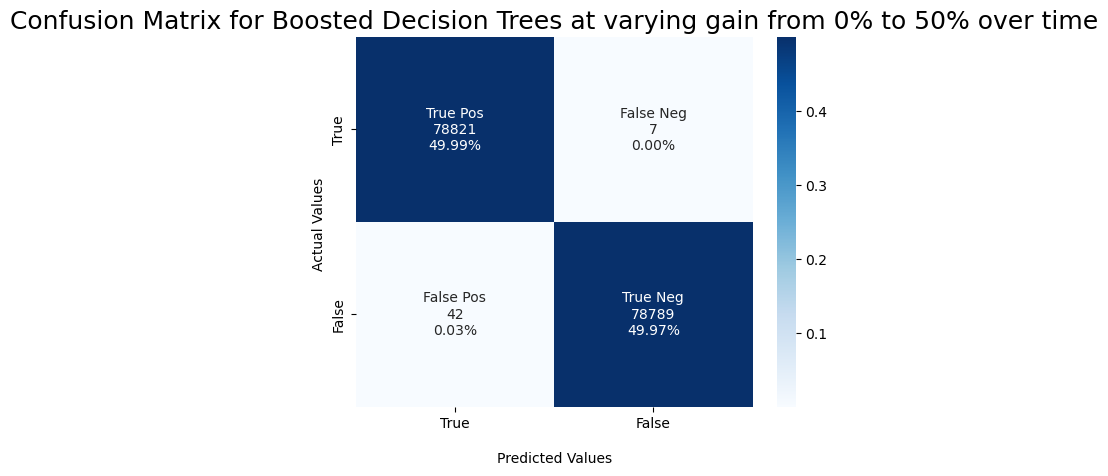

In [66]:
group_names = ['True Pos','False Neg','False Pos','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='',cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.title('Confusion Matrix for Boosted Decision Trees at varying gain from 0% to 50% over time', fontsize=18)
plt.show()

In [67]:
cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_b_vg)

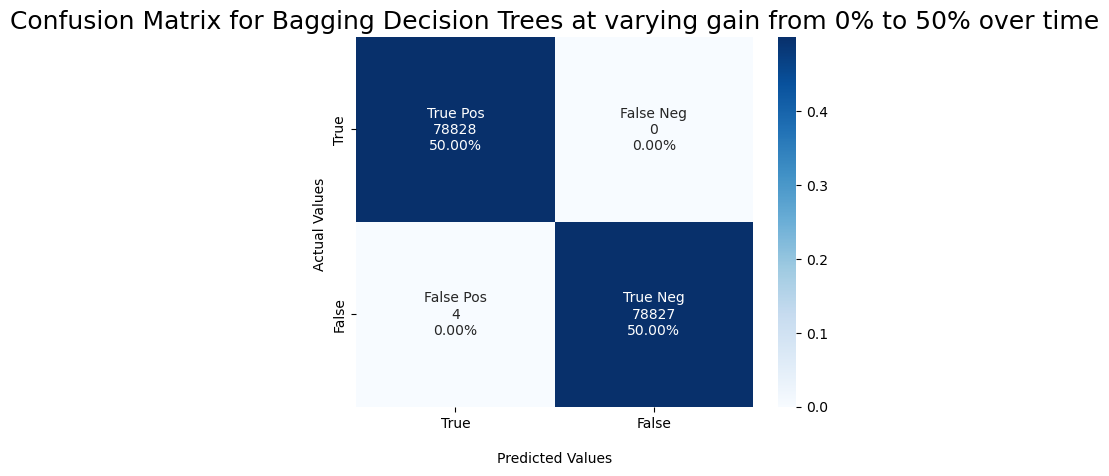

In [68]:
group_names = ['True Pos','False Neg','False Pos','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='',cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.title('Confusion Matrix for Bagging Decision Trees at varying gain from 0% to 50% over time', fontsize=18)
plt.show()

NameError: name 'x' is not defined

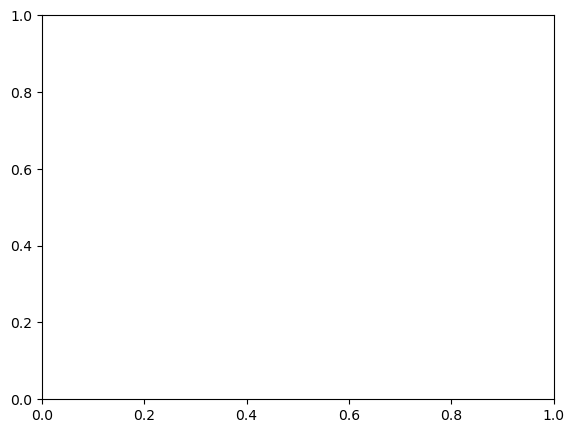

In [69]:
fig= plt.figure()
axes= fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(x,y)
sns.set_style('darkgrid')
x1 = ['Boost', 'Bagging']
y1 = [metrics.auc(fpr_g_vg, tpr_g_vg), metrics.auc(fpr_b_vg, tpr_b_vg)]

sns.barplot(x=y1,y=x1, width = 0.5)
axes.set_title('varying gain from 0% to 50% over time')
plt.show()

In [70]:
acc = []
offset = []
gain = []
stuck = []
out_bounds = []


#train_data = data[0:20000]
#test_data = data[20000:30000]  


supply_temp_train = train_data.drop(['OA_TEMP','ZONE_TEMP_1','ZONE_TEMP_2','ZONE_TEMP_3','ZONE_TEMP_4'], axis=1)
stuck_val = random.randint(16,32)
print(stuck_val)

FaultData, classification = simulateFault(supply_temp_train['SA_TEMP'],{'constant': 2, 'coeff': 1.05, 'cg':[2.0, 1.05], 'varing time gain': [1.00,1.5] ,'stuck': stuck_val, 'bounds': [14,60]})
print(FaultData.shape)
print(classification.shape)
#balance FaultData and classification so ouput is balance 
#-------------------------------------------------------------



#---------------------------------------------------------------
supply_temp_train['supply_temp_BMS'] = FaultData
#supply_temp_train['classification'] = classification
supply_temp_train['lag_1'] = supply_temp_train['SA_TEMP'].shift(1)
supply_temp_train['lag_2'] = supply_temp_train['supply_temp_BMS'].shift(1)
supply_temp_train['lag_3'] = supply_temp_train['SA_TEMP'].shift(2)
supply_temp_train['lag_4'] = supply_temp_train['supply_temp_BMS'].shift(2)
supply_temp_train['lag_5'] = supply_temp_train['SA_TEMP'].shift(3)
supply_temp_train['lag_6'] = supply_temp_train['supply_temp_BMS'].shift(3)
supply_temp_train = supply_temp_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
supply_temp_train = supply_temp_train.dropna()
x_train = supply_temp_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
print(x_train)
y_train = classification[0:len(classification)-3]#supply_temp_train[['classification']]


#Create a svm Classifier
#clf = svm.SVC(kernel='rbf', C = 1, gamma = 0.6, probability = True) # Linear Kernel 
gnb = GaussianNB()
gnb.fit(x_train, y_train)
#Train the model using the training sets
#clf.fit(x_train, y_train)

26
(367878,)
(367878,)
                          lag_1    lag_2       lag_3    lag_4       lag_5  \
Datetime                                                                    
2018-02-23 16:46:00  285.817107  287.817  285.884094  287.884  285.880003   
2018-09-16 16:53:00  285.880003  287.880  285.817107  287.817  285.884094   
2018-06-03 06:22:00  285.879914  287.880  285.880003  287.880  285.817107   
2018-12-05 05:15:00  285.870390  287.870  285.879914  287.880  285.880003   
2018-01-23 08:45:00  293.202756  295.203  285.870390  287.870  285.879914   
...                         ...      ...         ...      ...         ...   
2018-04-08 03:16:00  286.690521  286.691  285.912504  285.913  286.394103   
2018-08-25 06:13:00  286.290253  286.290  286.690521  286.691  285.912504   
2018-01-15 04:55:00  285.879730  285.880  286.290253  286.290  286.690521   
2018-09-17 17:48:00  293.348322  293.348  285.879730  285.880  286.290253   
2018-01-24 12:56:00  294.265011  294.265  293.348322 

GaussianNB()

In [71]:
errType = 'stuck'
#test_data = data[int(len(data)*0.8):] #data[end_index-1:end_index + 10]
#test_data = test_data.reset_index()
supply_temp_test = test_data.drop(['OA_TEMP','ZONE_TEMP_1','ZONE_TEMP_2','ZONE_TEMP_3','ZONE_TEMP_4'], axis=1)
#stuck_val = random.randint(16,32)
#print(stuck_val)

#FaultData, classification = simulateFault(supply_temp_test['supply_temp'], {'constant': 4, 'coeff':1.7, 'stuck': stuck_val,'bounds': [14,60]})

FaultData, classification = simulateSpecificFault(test_data['SA_TEMP'], errType, stuck_val )
supply_temp_test['supply_temp_BMS'] = FaultData
#supply_temp_test['classification'] = classification[2:len(classification)]
supply_temp_test['lag_1'] = supply_temp_test['SA_TEMP'].shift(1)
supply_temp_test['lag_2'] = supply_temp_test['supply_temp_BMS'].shift(1)
supply_temp_test['lag_3'] = supply_temp_test['SA_TEMP'].shift(2)
supply_temp_test['lag_4'] = supply_temp_test['supply_temp_BMS'].shift(2)
supply_temp_test['lag_5'] = supply_temp_test['SA_TEMP'].shift(3)
supply_temp_test['lag_6'] = supply_temp_test['supply_temp_BMS'].shift(3)
supply_temp_test = supply_temp_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
supply_temp_test = supply_temp_test.dropna()
x_test = supply_temp_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
y_test = classification[0:len(classification)-3]#supply_temp_test[['classification']]
x_test = x_test.reset_index(drop=True)
x_test = np.array(x_test)
y_test = np.array(y_test)
y_pred = gnb.predict(x_test)

#scores = cross_val_score(clf, np.concatenate((x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0), cv=5)
#print(scores)
#target_names = ['No Fault', 'Offset', 'Gain', 'Stuck','Out of Bounds']

target_names = ['No Fault', 'Fault']
#print('FOR rate: ',i)
cnf_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))
column_sum = cnf_matrix.sum(axis = 1)
#print(column_sum)
acc.append(cnf_matrix[1][1] / column_sum[1])
# offset.append(cnf_matrix[1][1] / column_sum[1] )
# gain.append(cnf_matrix[2][2] / column_sum[2])
# stuck.append(cnf_matrix[3][3] / column_sum[3])
# out_bounds.append(cnf_matrix[3][3] / column_sum[3])

#print(acc)
#i = i + 0.1 

              precision    recall  f1-score   support

    No Fault       1.00      0.99      0.99     78828
       Fault       0.99      1.00      0.99     78831

    accuracy                           0.99    157659
   macro avg       0.99      0.99      0.99    157659
weighted avg       0.99      0.99      0.99    157659



In [72]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_features=5, n_estimators=30,
                           random_state=100)

In [73]:
y_pred_g_s = gbc.predict(x_test)

#scores = cross_val_score(clf, np.concatenate((x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0), cv=5)
#print(scores)
#target_names = ['No Fault', 'Offset', 'Gain', 'Stuck','Out of Bounds']

target_names = ['No Fault', 'Fault']
#print('FOR rate: ',i)
cnf_matrix = confusion_matrix(y_test, y_pred_g_s)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred_g_s, target_names=target_names))
column_sum = cnf_matrix.sum(axis = 1)
#print(column_sum)
acc.append(cnf_matrix[1][1] / column_sum[1])
# offset.append(cnf_matrix[1][1] / column_sum[1] )
# gain.append(cnf_matrix[2][2] / column_sum[2])
# stuck.append(cnf_matrix[3][3] / column_sum[3])
# out_bounds.append(cnf_matrix[3][3] / column_sum[3])

#print(acc)
#i = i + 0.1 

              precision    recall  f1-score   support

    No Fault       1.00      1.00      1.00     78828
       Fault       1.00      1.00      1.00     78831

    accuracy                           1.00    157659
   macro avg       1.00      1.00      1.00    157659
weighted avg       1.00      1.00      1.00    157659



In [80]:
print("Boosted decision tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_g_s)*100)
print(y_test)
print(confusion_matrix(y_test, y_pred_g_s))
fpr_g_s, tpr_g_s,thresholds = metrics.roc_curve(y_test, y_pred_g_s)
print("Boosted decision tree model auc(in %):", metrics.auc(fpr_g_s, tpr_g_s)*100)
log_loss(y_test,  y_pred_g_s, eps=1e-15)
print("Number of mislabeled points out of a total %d points : %d"
         % (x_test.shape[0], (y_test != y_pred_g_s).sum()))

Boosted decision tree model accuracy(in %): 99.9987314393723
[1 1 1 ... 0 0 0]
[[78826     2]
 [    0 78831]]
Boosted decision tree model auc(in %): 99.99873141523317
Number of mislabeled points out of a total 157659 points : 2


In [81]:
bgclassifier.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=200,
                  random_state=100)

In [82]:
y_pred_b_s = bgclassifier.predict(x_test)

#scores = cross_val_score(clf, np.concatenate((x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0), cv=5)
#print(scores)
#target_names = ['No Fault', 'Offset', 'Gain', 'Stuck','Out of Bounds']

target_names = ['No Fault', 'Fault']
#print('FOR rate: ',i)
cnf_matrix = confusion_matrix(y_test, y_pred_b_s)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred_b_s, target_names=target_names))
column_sum = cnf_matrix.sum(axis = 1)
#print(column_sum)
acc.append(cnf_matrix[1][1] / column_sum[1])

              precision    recall  f1-score   support

    No Fault       1.00      1.00      1.00     78828
       Fault       1.00      1.00      1.00     78831

    accuracy                           1.00    157659
   macro avg       1.00      1.00      1.00    157659
weighted avg       1.00      1.00      1.00    157659



In [86]:
print("Bagging decision tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_b_s)*100)
print(confusion_matrix(y_test, y_pred_b_s))
fpr_b_s, tpr_b_s, thresholds = metrics.roc_curve(y_test, y_pred_b_s)
print(y_pred_b_s)
print(y_test)
print("Bagging decision tree model auc(in %):", metrics.auc(fpr_b_s, tpr_b_s)*100)
log_loss(y_test,  y_pred_b_s, eps=1e-15)
print("Number of mislabeled points out of a total %d points : %d"
         % (x_test.shape[0], (y_test != y_pred_b_s).sum()))

Bagging decision tree model accuracy(in %): 100.0
[[78828     0]
 [    0 78831]]
[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]
Bagging decision tree model auc(in %): 100.0
Number of mislabeled points out of a total 157659 points : 0


In [87]:
cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_g_s)

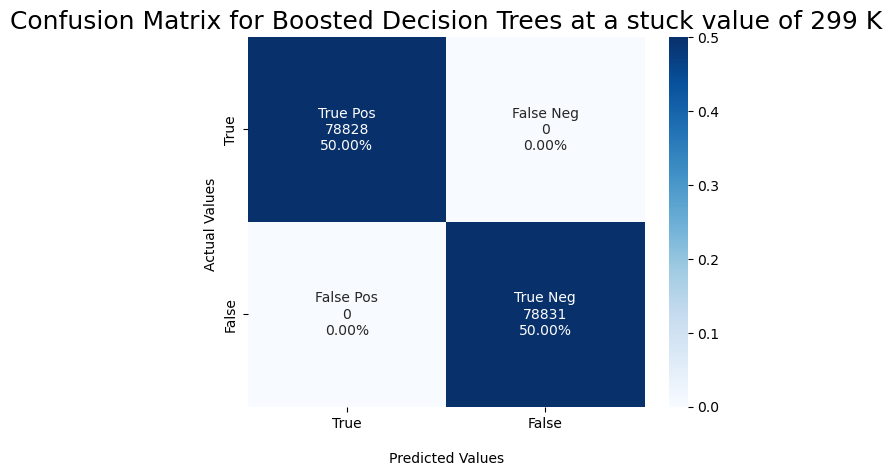

In [138]:
group_names = ['True Pos','False Neg','False Pos','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='',cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
stuck_val = 26+273
plt.title('Confusion Matrix for Boosted Decision Trees at a stuck value of %d K' % stuck_val, fontsize=18)
plt.show()

In [139]:
cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_b_s)

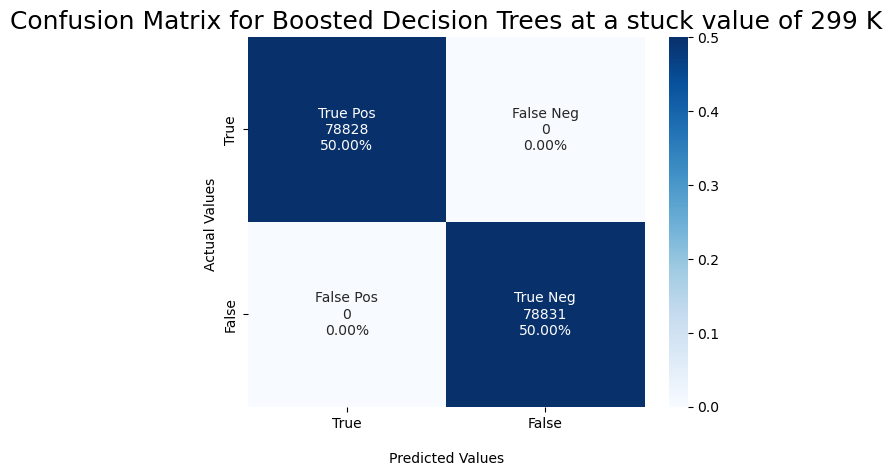

In [140]:
group_names = ['True Pos','False Neg','False Pos','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='',cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.title('Confusion Matrix for Boosted Decision Trees at a stuck value of %d K' % stuck_val, fontsize=18)
plt.show()

NameError: name 'x' is not defined

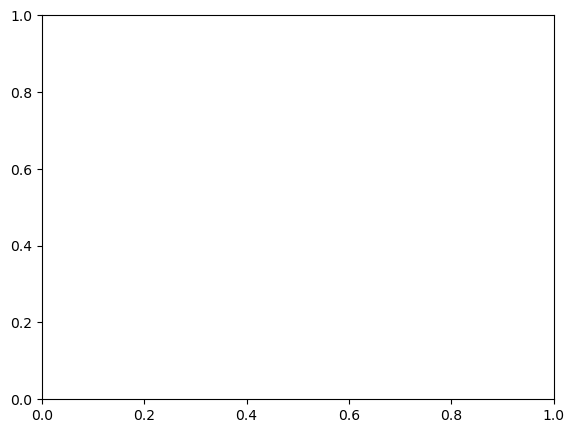

In [91]:
fig= plt.figure()
axes= fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(x,y)
sns.set_style('darkgrid')
x1 = ['Boost', 'Bagging']
y1 = [metrics.auc(fpr_g_s, tpr_g_s), metrics.auc(fpr_b_s, tpr_b_s)]

sns.barplot(x=y1,y=x1, width = 0.5)
axes.set_title('Stuck Value')
plt.show()

In [97]:
acc = []
offset = []
gain = []
stuck = []
out_bounds = []


#train_data = data[0:20000]
#test_data = data[20000:30000]  


supply_temp_train = train_data.drop(['OA_TEMP','ZONE_TEMP_1','ZONE_TEMP_2','ZONE_TEMP_3','ZONE_TEMP_4'], axis=1)
stuck_val = random.randint(16,32)
print(stuck_val)

FaultData, classification = simulateFault(supply_temp_train['SA_TEMP'],{'constant': 2, 'coeff': 1.00, 'cg':[1.0, 1.00], 'varing time gain': [1.00,1.0] ,'stuck': stuck_val, 'bounds': [14,60]})
print(FaultData.shape)
print(classification.shape)
#balance FaultData and classification so ouput is balance 
#-------------------------------------------------------------



#---------------------------------------------------------------
supply_temp_train['supply_temp_BMS'] = FaultData
#supply_temp_train['classification'] = classification
supply_temp_train['lag_1'] = supply_temp_train['SA_TEMP'].shift(1)
supply_temp_train['lag_2'] = supply_temp_train['supply_temp_BMS'].shift(1)
supply_temp_train['lag_3'] = supply_temp_train['SA_TEMP'].shift(2)
supply_temp_train['lag_4'] = supply_temp_train['supply_temp_BMS'].shift(2)
supply_temp_train['lag_5'] = supply_temp_train['SA_TEMP'].shift(3)
supply_temp_train['lag_6'] = supply_temp_train['supply_temp_BMS'].shift(3)
supply_temp_train = supply_temp_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
supply_temp_train = supply_temp_train.dropna()
x_train = supply_temp_train[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
print(x_train)
y_train = classification[0:len(classification)-3]#supply_temp_train[['classification']]


#Create a svm Classifier
#clf = svm.SVC(kernel='rbf', C = 1, gamma = 0.6, probability = True) # Linear Kernel 
gnb = GaussianNB()
gnb.fit(x_train, y_train)
#Train the model using the training sets
#clf.fit(x_train, y_train)

24
(367878,)
(367878,)
                          lag_1    lag_2       lag_3    lag_4       lag_5  \
Datetime                                                                    
2018-02-23 16:46:00  285.817107  287.817  285.884094  287.884  285.880003   
2018-09-16 16:53:00  285.880003  287.880  285.817107  287.817  285.884094   
2018-06-03 06:22:00  285.879914  287.880  285.880003  287.880  285.817107   
2018-12-05 05:15:00  285.870390  287.870  285.879914  287.880  285.880003   
2018-01-23 08:45:00  293.202756  295.203  285.870390  287.870  285.879914   
...                         ...      ...         ...      ...         ...   
2018-04-08 03:16:00  286.690521  286.691  285.912504  285.913  286.394103   
2018-08-25 06:13:00  286.290253  286.290  286.690521  286.691  285.912504   
2018-01-15 04:55:00  285.879730  285.880  286.290253  286.290  286.690521   
2018-09-17 17:48:00  293.348322  293.348  285.879730  285.880  286.290253   
2018-01-24 12:56:00  294.265011  294.265  293.348322 

GaussianNB()

In [98]:
errType = 'bounds'
#test_data = data[int(len(data)*0.8):] #data[end_index-1:end_index + 10]
#test_data = test_data.reset_index()
supply_temp_test = test_data.drop(['OA_TEMP','ZONE_TEMP_1','ZONE_TEMP_2','ZONE_TEMP_3','ZONE_TEMP_4'], axis=1)
#stuck_val = random.randint(16,32)
#print(stuck_val)

#FaultData, classification = simulateFault(supply_temp_test['supply_temp'], {'constant': 4, 'coeff':1.7, 'stuck': stuck_val,'bounds': [14,60]})

FaultData, classification = simulateSpecificFault(test_data['SA_TEMP'], errType, [14,60] )
supply_temp_test['supply_temp_BMS'] = FaultData
#supply_temp_test['classification'] = classification[2:len(classification)]
supply_temp_test['lag_1'] = supply_temp_test['SA_TEMP'].shift(1)
supply_temp_test['lag_2'] = supply_temp_test['supply_temp_BMS'].shift(1)
supply_temp_test['lag_3'] = supply_temp_test['SA_TEMP'].shift(2)
supply_temp_test['lag_4'] = supply_temp_test['supply_temp_BMS'].shift(2)
supply_temp_test['lag_5'] = supply_temp_test['SA_TEMP'].shift(3)
supply_temp_test['lag_6'] = supply_temp_test['supply_temp_BMS'].shift(3)
supply_temp_test = supply_temp_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
supply_temp_test = supply_temp_test.dropna()
x_test = supply_temp_test[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']]
y_test = classification[0:len(classification)-3]#supply_temp_test[['classification']]
x_test = x_test.reset_index(drop=True)
x_test = np.array(x_test)
y_test = np.array(y_test)
y_pred = gnb.predict(x_test)

#scores = cross_val_score(clf, np.concatenate((x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0), cv=5)
#print(scores)
#target_names = ['No Fault', 'Offset', 'Gain', 'Stuck','Out of Bounds']

target_names = ['No Fault', 'Fault']
#print('FOR rate: ',i)
cnf_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))
column_sum = cnf_matrix.sum(axis = 1)
#print(column_sum)
acc.append(cnf_matrix[1][1] / column_sum[1])
# offset.append(cnf_matrix[1][1] / column_sum[1] )
# gain.append(cnf_matrix[2][2] / column_sum[2])
# stuck.append(cnf_matrix[3][3] / column_sum[3])
# out_bounds.append(cnf_matrix[3][3] / column_sum[3])

#print(acc)
#i = i + 0.1 

              precision    recall  f1-score   support

    No Fault       0.67      0.99      0.80     78828
       Fault       0.98      0.51      0.67     78831

    accuracy                           0.75    157659
   macro avg       0.82      0.75      0.73    157659
weighted avg       0.82      0.75      0.73    157659



In [99]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_features=5, n_estimators=30,
                           random_state=100)

In [100]:
y_pred_g = gbc.predict(x_test)

#scores = cross_val_score(clf, np.concatenate((x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0), cv=5)
#print(scores)
#target_names = ['No Fault', 'Offset', 'Gain', 'Stuck','Out of Bounds']

target_names = ['No Fault', 'Fault']
#print('FOR rate: ',i)
cnf_matrix = confusion_matrix(y_test, y_pred_g)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred_g, target_names=target_names))
column_sum = cnf_matrix.sum(axis = 1)
#print(column_sum)
acc.append(cnf_matrix[1][1] / column_sum[1])
# offset.append(cnf_matrix[1][1] / column_sum[1] )
# gain.append(cnf_matrix[2][2] / column_sum[2])
# stuck.append(cnf_matrix[3][3] / column_sum[3])
# out_bounds.append(cnf_matrix[3][3] / column_sum[3])

#print(acc)
#i = i + 0.1 

              precision    recall  f1-score   support

    No Fault       0.99      1.00      0.99     78828
       Fault       1.00      0.99      0.99     78831

    accuracy                           0.99    157659
   macro avg       0.99      0.99      0.99    157659
weighted avg       0.99      0.99      0.99    157659



In [101]:
print("Boosted decision tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_g)*100)
print(y_test)
print(confusion_matrix( y_test, y_pred_g))
fpr_g, tpr_g, thresholds = metrics.roc_curve(y_test, y_pred_g)
print("Boosted decision tree model auc(in %):", metrics.auc(fpr_g, tpr_g)*100)
log_loss(y_test,  y_pred_g, eps=1e-15)
print("Number of mislabeled points out of a total %d points : %d"
         % (x_test.shape[0], (y_test != y_pred_g).sum()))

Boosted decision tree model accuracy(in %): 99.3777710121211
[1 1 1 ... 0 0 0]
[[78777    51]
 [  930 77901]]
Boosted decision tree model auc(in %): 99.3777816208505
Number of mislabeled points out of a total 157659 points : 981


In [102]:
bgclassifier.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=200,
                  random_state=100)

In [103]:
y_pred_b = bgclassifier.predict(x_test)

#scores = cross_val_score(clf, np.concatenate((x_train, x_test), axis=0), np.concatenate((y_train, y_test), axis=0), cv=5)
#print(scores)
#target_names = ['No Fault', 'Offset', 'Gain', 'Stuck','Out of Bounds']

target_names = ['No Fault', 'Fault']
#print('FOR rate: ',i)
cnf_matrix = confusion_matrix(y_test, y_pred_b)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred_b, target_names=target_names))
column_sum = cnf_matrix.sum(axis = 1)
#print(column_sum)
acc.append(cnf_matrix[1][1] / column_sum[1])

              precision    recall  f1-score   support

    No Fault       0.98      0.95      0.96     78828
       Fault       0.95      0.99      0.97     78831

    accuracy                           0.97    157659
   macro avg       0.97      0.97      0.97    157659
weighted avg       0.97      0.97      0.97    157659



In [104]:
print("Bagging decision tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_b)*100)
print(confusion_matrix(y_test, y_pred_b))
fpr_b, tpr_b, thresholds = metrics.roc_curve(y_test, y_pred_b)
print(y_pred)
print(y_test)
print("Bagging decision tree model auc(in %):", metrics.auc(fpr_b, tpr_b)*100)
log_loss(y_test,  y_pred_b, eps=1e-15)
print("Number of mislabeled points out of a total %d points : %d"
         % (x_test.shape[0], (y_test != y_pred_b).sum()))

Bagging decision tree model accuracy(in %): 96.55585789583849
[[74541  4287]
 [ 1143 77688]]
[0 0 0 ... 0 0 0]
[1 1 1 ... 0 0 0]
Bagging decision tree model auc(in %): 96.55581994856918
Number of mislabeled points out of a total 157659 points : 5430


In [105]:
cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_g)

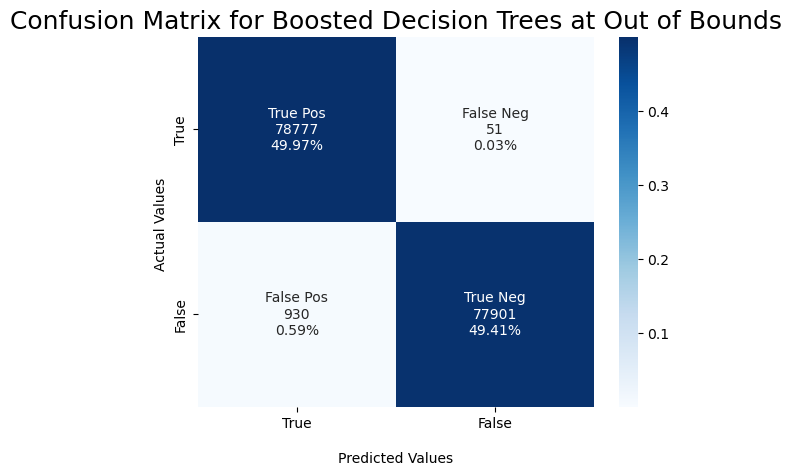

In [106]:
group_names = ['True Pos','False Neg','False Pos','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='',cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.title('Confusion Matrix for Boosted Decision Trees at Out of Bounds', fontsize=18)
plt.show()

In [107]:
cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_b)

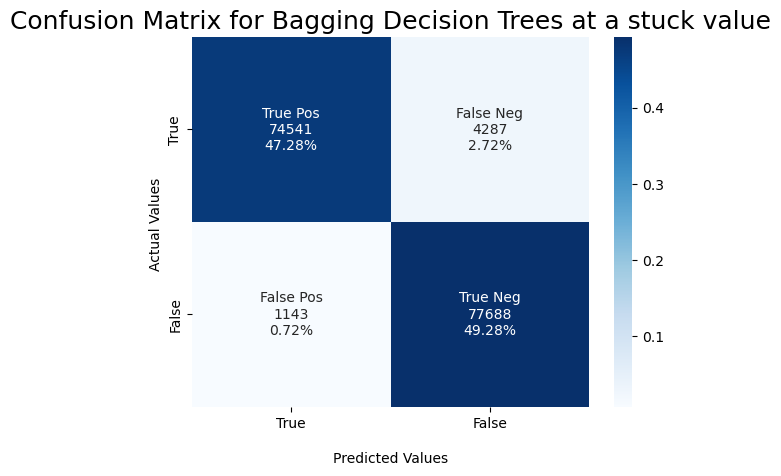

In [108]:
group_names = ['True Pos','False Neg','False Pos','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='',cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.title('Confusion Matrix for Bagging Decision Trees at a stuck value', fontsize=18)
plt.show()

NameError: name 'x' is not defined

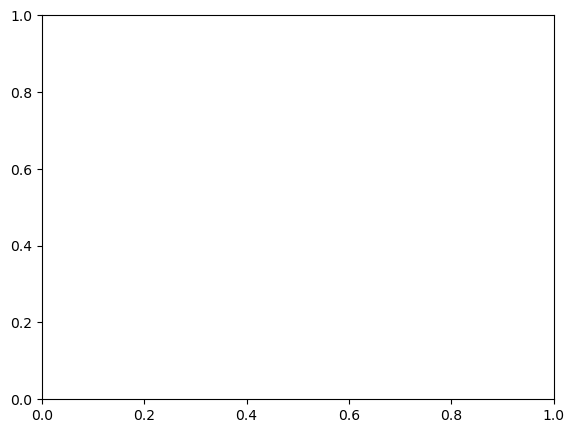

In [109]:
fig= plt.figure()
axes= fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(x,y)
sns.set_style('darkgrid')
x1 = ['Boost', 'Bagging']
y1 = [metrics.auc(fpr_g, tpr_g), metrics.auc(fpr_b, tpr_b)]

sns.barplot(x=y1,y=x1, width = 0.5)
axes.set_title('Out of Bounds')
plt.show()

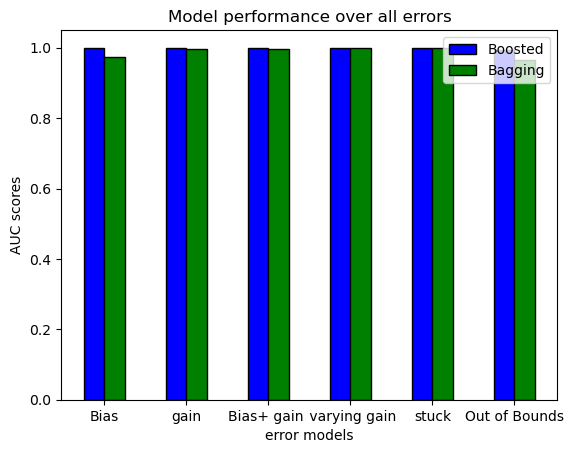

In [114]:
boosted = [metrics.auc(fpr_g_c, tpr_g_c), metrics.auc(fpr_g_g, tpr_g_g), metrics.auc(fpr_g_cg, tpr_g_cg), metrics.auc(fpr_g_vg, tpr_g_vg),metrics.auc(fpr_g_s, tpr_g_s), metrics.auc(fpr_g, tpr_g)]
bagging = [metrics.auc(fpr_b_c, tpr_b_c), metrics.auc(fpr_b_g, tpr_b_g), metrics.auc(fpr_b_cg, tpr_b_cg), metrics.auc(fpr_b_vg, tpr_b_vg),metrics.auc(fpr_b_s, tpr_b_s), metrics.auc(fpr_b, tpr_b)]
  
n=6
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, boosted, color = 'b',
        width = width, edgecolor = 'black',
        label='Boosted')
plt.bar(r + width, bagging, color = 'g',
        width = width, edgecolor = 'black',
        label='Bagging')
  
plt.xlabel("error models")
plt.ylabel("AUC scores")
plt.title("Model performance over all errors")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,['Bias','gain','Bias+ gain ',' varying gain', 'stuck', 'Out of Bounds'])
plt.legend()
  
plt.show()